<a href="https://colab.research.google.com/github/surname0990/CEX-and-DEX-bot-arbitrage/blob/main/%224Cex_arbitrage_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pybit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 3.0 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 106 kB 47.7 MB/s 
  Created wheel for pybit: filename=pybit-2.4.1-py2.py3-none-any.whl size=48207 sha256=6ef72c5856891e77ff37d4a8ac651115a73f4cb6b3562b6435236873f55958ac
  Stored in directory: /root/.cache/pip/wheels/80/ca/f2/63bafd2858cefce6e175b7b2eab77ac90436b910d944248805
Successfully built pybit


In [2]:
pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 292 kB 10.9 MB/s 
     |████████████████████████████████| 749 kB 45.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [3]:
from binance.client import Client
import requests , pprint
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from pybit import spot
from datetime import datetime

In [ ]:
def get_dt_bin(token1: str, token2: str,interval: str, hz : str) -> object :  #interval = 1m
  pairs = str(token1 + token2).upper()
  client = Client()
  binance_df = pd.DataFrame(client.get_historical_klines(pairs,interval,))
  binance_df = binance_df.iloc[:,:6]
  binance_df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
  binance_df = binance_df.set_index('Time')
  binance_df.index = pd.to_datetime(binance_df.index, unit='ms')
  binance_df = binance_df.astype(float) 
  return binance_df

In [ ]:
def get_dt_bybit(token1: str, token2: str,interval: str) --> object :  #interval = "1m"
  session = spot.HTTP(endpoint="https://api.bybit.com")
  pairs = str(token1 + token2).upper()
  kline = session.query_kline(symbol=pairs ,interval=interval)
  kline = kline['result']
  bybit_df = pd.DataFrame(kline)
  bybit_df = bybit_df.iloc[:,:6]
  bybit_df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
  bybit_df = bybit_df.set_index('Time')
  bybit_df.index = pd.to_datetime(bybit_df.index, unit='ms')
  bybit_df = bybit_df.astype(float)
  return bybit_df

In [ ]:
def get_dt_okex(token1: str, token2: str,interval: str) -> object :  #interval = "1m", 
  url = 'https://www.okex.com'
  pairs = str(token1 + "-" + token2).upper()
  okex_df = pd.DataFrame((requests.get(url+'/api/v5/market/history-candles?bar='+ interval +'&instId='+ pairs +'-SWAP').json())['data'])
  okex_df = okex_df.iloc[:,:6]
  okex_df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
  okex_df = okex_df.set_index('Time')
  okex_df.index = pd.to_datetime(okex_df.index, unit='ms')
  okex_df = okex_df.astype(float)  
  return okex_df

In [ ]:
def search_interval(interval: str) -> str:
  intervals = {'1m': "1min"}
  if interval in intervals:
    return(intervals[interval])
  else :
    pass

In [ ]:
def get_dt_huobi(token1: str, token2: str, interval: str) -> object :
  pairs = str(token1 + token2).lower()
  url_2 = 'https://api.huobi.pro'
  huobi_df = pd.DataFrame((requests.get(url_2+"/market/history/kline?period="+ self.search_interval(interval) +"&size=1000&symbol="+ pairs).json())['data'])
  huobi_df = huobi_df.iloc[:,:6]
  huobi_df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
  huobi_df = huobi_df.set_index('Time')
  huobi_df.index = pd.to_datetime(huobi_df.index, unit='s')
  huobi_df = huobi_df.astype(float)  
  return huobi_df

In [ ]:
def get_dt_pancake(token1: str, token2: str, interval: str) -> object :
  
  while True:
    price = self.get_price_dex_in()
    time1 = float(            )
    pancake_df1 = pd.DataFrame({'Time':[time1], 'Close':[price],})
    pancake_df1 = pancake_df1.set_index('Time')
    pancake_df1 = pancake_df1.astype(float)  
    pancake_df1.index = pd.to_datetime(pancake_df1.index, unit='ms')
    pancake_df = pancake_df.append(pancake_df1)
    time.sleep(60)  #interval
  return pancake_df


In [ ]:
def get_price_dex_in(token1, token2, block_number, exchange):
    trans = '1f00ca74'
    result = get_price_dex(self.search_addr_erc(token1), self.search_addr_erc(token2), block_number, self.search_addr_erc(exchange), trans)
    return int(result[-128:-64], 16) / 10 ** 18

In [ ]:
def get_price_dex(addr1, addr2, block_number, exchange, trans):
    data = f'0x{trans}{10**18:064X}{64:064X}{2:064X}{int(addr1, 16):064X}{int(addr2, 16):064X}'

    tx = {
        "jsonrpc": "2.0", 
        "method": "eth_call", 
        "params": [{
                "from": "0xB17bd3C42FB53eaaf84C169356D3a14275811eD7",
                "to": exchange,
                "data": data,
            }, 
            hex(block_number)
        ], 
        "id": 1
    }
    output = requests.post(
        'https://bsc-dataseed.binance.org/',
        json=tx
    )
    data = json.loads(output.text)

    if 'error' in data:
        return get_price_dex(addr1, addr2, block_number, exchange, trans)
    else:
        return data['result']

In [ ]:
def search_addr_erc(token: str) -> str:
  token = str(token).lower()
  addr_token = {'busd': "e9e7cea3dedca5984780bafc599bd69add087d56",
                'eth': "bb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c"}
  if token in addr_token:
    return(addr_token[token])
  else :
    pass  

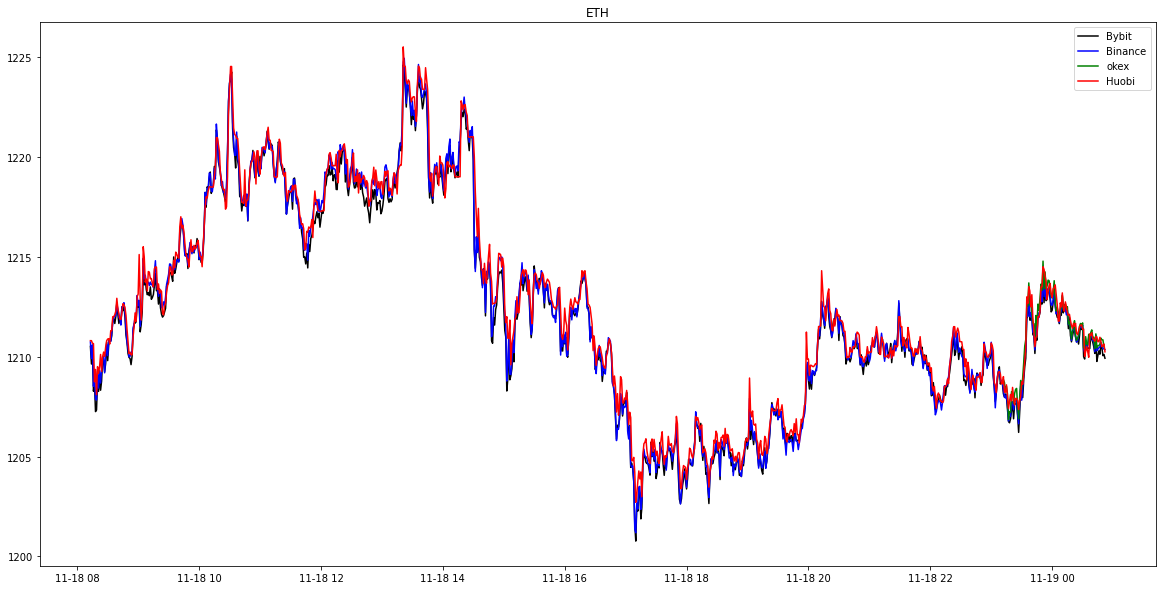

In [ ]:
def get_graph(token1: str, token2: str, interval: str):
  plt.figure(figsize=(20, 10))
  plt.plot(self.get_dt_bybit()['Close'],label='Bybit', color='black')
  plt.plot(self.get_dt_bin()['Close'], label='Binance', color='blue')
  plt.plot(self.get_dt_okex()['Close'], label='okex', color='green')
  plt.plot(self.get_dt_huobi()['Close'], label='Huobi',color='red')
  plt.plot(self.get_dt_pancake()['Close'], label='Pancake',color='orange')
  plt.title(self.token1)
  plt.legend(['Bybit', 'Binance','okex','Huobi','Pancake'])
